In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("y_train:", y_train.shape)
print("b1:", b1.shape)
batch_size = N_tr


x_train:  (50000, 3072)
w1: (3072, 10)
y_train: (50000, 10)
b1: (10,)


In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [3]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [5]:
epochs = 50
lr = 0.01
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(N_tr)
    rng.shuffle(indices)
    # Forward pass
    h = np.matmul(x_train,w1)+np.transpose(b1)
    y_pred  = sigmoid(h)
    #print(y_pred[0])
    #loss = (1/(2*N_tr))*(np.sum(np.square(y_pred - y_train)))
    loss = (1/N_tr)*(np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred))))

    loss_history.append(loss)
    reg.append(t)

    #print(y_pred[0])
    print('epoch',t,'loss',loss)

    # Backw propogation
    lr = lr * (1 / (1 + lr_decay * t))
    w1 = w1 - lr*(1/N_tr)*np.matmul(np.transpose(x_train),(y_pred-y_train))

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1
    
    comp = np.all(y_out==y_train,axis = 1)
    
    accuracy = np.sum(comp)/N_tr
    train_acc_history.append(accuracy)
    print(accuracy*100)
    
# Printing accuracies and displaying w as images

epoch 0 loss 6.9314776124250415
8.942
epoch 1 loss 6.919009475037404
24.368000000000002
epoch 2 loss 6.908597432128482
24.728
epoch 3 loss 6.899783587378984
24.984
epoch 4 loss 6.892221750123788
25.259999999999998
epoch 5 loss 6.8856497228213165
25.612000000000002
epoch 6 loss 6.879868249703953
25.887999999999998
epoch 7 loss 6.874725191993898
26.136
epoch 8 loss 6.870103705167019
26.388
epoch 9 loss 6.865913434608653
26.66
epoch 10 loss 6.8620839668894
26.894000000000002
epoch 11 loss 6.858559957660439
27.107999999999997
epoch 12 loss 6.8552975023431975
27.35
epoch 13 loss 6.852261427083435
27.572000000000003
epoch 14 loss 6.849423261239385
27.77
epoch 15 loss 6.846759715090303
27.998
epoch 16 loss 6.844251532646106
28.222
epoch 17 loss 6.841882623508475
28.4
epoch 18 loss 6.83963940281952
28.566000000000003
epoch 19 loss 6.83751028679852
28.714000000000002
epoch 20 loss 6.83548530496302
28.896
epoch 21 loss 6.833555800150658
29.082
epoch 22 loss 6.831714194852935
29.268
epoch 23 loss

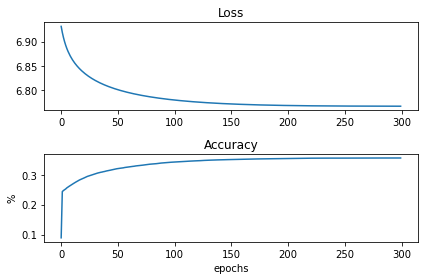

In [7]:
fig,ax = plt.subplots(2,1)
ax[0].plot(reg,loss_history)
ax[1].plot(reg,train_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

In [117]:
#Testing
h_testing = np.matmul(x_test,w1)+np.transpose(b1)
y_pred_test  = sigmoid(h_testing)
loss_test = (1/N_te)*(np.sum(np.multiply(-y_test,np.log(y_pred_test)) - np.multiply(1-y_test,np.log(1-y_pred_test))))
y_out_test = np.zeros_like(y_test)
y_out_test[np.arange(len(y_test)), y_pred_test.argmax(1)] = 1
    
comp_test = np.all(y_out_test==y_test,axis = 1)
    
accuracy = np.sum(comp_test)/N_te
print("Test data loss :",loss_test)
print("Test data accuracy :",accuracy*100)

Test data loss : 6.798905306965283
Test data accuracy : 32.029999999999994


## Part 2

In [126]:
def sigmoid_derive(x):
    return x*(1-x)

In [189]:
std=1e-5
Din = 3072
HL1_nodes  =200
HL2_nodes = 200
K = 10
w1 = std*np.random.randn(Din, HL1_nodes)
b1 = np.zeros(HL1_nodes)

w2 = std*np.random.randn(HL1_nodes, HL2_nodes)
b2 = np.zeros(HL2_nodes)

w3 = std*np.random.randn(HL2_nodes, K)
b3 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
print("w3:", w3.shape)
print("b3:", b3.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 200)
b2: (200,)
w3: (200, 10)
b3: (10,)


In [188]:
epochs = 1
lr = 0.01
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):

    # Forward propagration
    a1 = x_train
    h1 = np.matmul(a1,w1)+np.transpose(b1)
    a2 = sigmoid(h1)
    h2 = np.matmul(a2,w2)+np.transpose(b2)
    a3 = sigmoid(h2)
    h3 = np.matmul(a3,w3)+np.transpose(b3)
    a4 = sigmoid(h3)

    y_pred = a4

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1

    loss = (1/N_tr)*np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred)))
    print("Epoch:",t," Loss:",loss)

    # Back propogation
    batchsize = N_tr

    w1_grad = np.zeros_like(w1)
    w2_grad = np.zeros_like(w2)
    w3_grad = np.zeros_like(w3)
    for i in range(batchsize):
        error4 = y_pred[i]-y_train[i]
        delta4 = np.multiply(error4,np.multiply(a4[i],1-a4[i]))
        error3 = np.matmul(delta4,np.transpose(w3))
        delta3 = np.multiply(error3,np.multiply(a3[i],1-a3[i]))
        error2 = np.matmul(delta3,np.transpose(w2))
        delta2 = np.multiply(error2,np.multiply(a2[i],1-a2[i]))

        delta4.reshape(len(delta4),1)
        delta3.reshape(len(delta3),1)
        delta2.reshape(len(delta2),1)

        w3_grad += np.dot(np.transpose(np.array([a3[i]])),np.array([delta4]))
        w2_grad += np.dot(np.transpose(np.array([a2[i]])),np.array([delta3]))
        w1_grad += np.dot(np.transpose(np.array([a1[i]])),np.array([delta2]))

    w3 = w3 - lr*w3_grad
    w2 = w2 - lr*w2_grad
    w1 = w1 - lr*w1_grad 


a2 (50000, 200)
a3 (50000, 200)
h3 (50000, 10)
Epoch: 0  Loss: 6.931465294679467


KeyboardInterrupt: 

In [191]:
epochs = 10
lr = 0.01
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    
    # Forward propagration
    a1 = x_train
    h1 = np.matmul(a1,w1)+np.transpose(b1)
    a2 = sigmoid(h1)
    h2 = np.matmul(a2,w2)+np.transpose(b2)
    a3 = sigmoid(h2)
    h3 = np.matmul(a3,w3)+np.transpose(b3)
    a4 = sigmoid(h3)

    y_pred = a4

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1

    loss = (1/N_tr)*np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred)))
    print("Epoch:",t," Loss:",loss)

    # Back propogation
    batchsize = 100

    w1_grad = np.zeros_like(w1)
    w2_grad = np.zeros_like(w2)
    w3_grad = np.zeros_like(w3)
    for i in range(batchsize):
        error4 = y_pred[i]-y_train[i]
        delta4 = np.multiply(error4,np.multiply(a4[i],1-a4[i]))
        error3 = np.matmul(delta4,np.transpose(w3))
        delta3 = np.multiply(error3,np.multiply(a3[i],1-a3[i]))
        error2 = np.matmul(delta3,np.transpose(w2))
        delta2 = np.multiply(error2,np.multiply(a2[i],1-a2[i]))

        delta4.reshape(len(delta4),1)
        delta3.reshape(len(delta3),1)
        delta2.reshape(len(delta2),1)

        w3_grad += np.dot(np.transpose(np.array([a3[i]])),np.array([delta4]))
        w2_grad += np.dot(np.transpose(np.array([a2[i]])),np.array([delta3]))
        w1_grad += np.dot(np.transpose(np.array([a1[i]])),np.array([delta2]))

    w3 = w3 - lr*w3_grad
    w2 = w2 - lr*w2_grad
    w1 = w1 - lr*w1_grad 

Epoch: 0  Loss: 5.074013608849425
Epoch: 1  Loss: 5.02858357121834
Epoch: 2  Loss: 4.981116473895389
Epoch: 3  Loss: 4.931460515349153
Epoch: 4  Loss: 4.879472670457116
Epoch: 5  Loss: 4.8250437093515615
Epoch: 6  Loss: 4.76814825820694
Epoch: 7  Loss: 4.708942114634182
Epoch: 8  Loss: 4.647942253571456
Epoch: 9  Loss: 4.586320452813903


## Task 3

In [221]:
epochs = 10
lr = 0.01
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(N_tr)
    rng.shuffle(indices)
    # Forward propagration
    a1 = x_train
    h1 = np.matmul(a1,w1)+np.transpose(b1)
    a2 = sigmoid(h1)
    h2 = np.matmul(a2,w2)+np.transpose(b2)
    a3 = sigmoid(h2)
    h3 = np.matmul(a3,w3)+np.transpose(b3)
    a4 = sigmoid(h3)

    y_pred = a4

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1

    loss = (1/N_tr)*np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred)))
    print("Epoch:",t," Loss:",loss)

    # Back propogation
    batchsize = 500

    w1_grad = np.zeros_like(w1)
    w2_grad = np.zeros_like(w2)
    w3_grad = np.zeros_like(w3)
    for i in indices[:batchsize]:
        error4 = y_pred[i]-y_train[i]
        delta4 = np.multiply(error4,np.multiply(a4[i],1-a4[i]))
        error3 = np.matmul(delta4,np.transpose(w3))
        delta3 = np.multiply(error3,np.multiply(a3[i],1-a3[i]))
        error2 = np.matmul(delta3,np.transpose(w2))
        delta2 = np.multiply(error2,np.multiply(a2[i],1-a2[i]))

        delta4.reshape(len(delta4),1)
        delta3.reshape(len(delta3),1)
        delta2.reshape(len(delta2),1)

        w3_grad += np.dot(np.transpose(np.array([a3[i]])),np.array([delta4]))
        w2_grad += np.dot(np.transpose(np.array([a2[i]])),np.array([delta3]))
        w1_grad += np.dot(np.transpose(np.array([a1[i]])),np.array([delta2]))

    w3 = w3 - lr*w3_grad
    w2 = w2 - lr*w2_grad
    w1 = w1 - lr*w1_grad 

Epoch: 0  Loss: 4.526216054054965
Epoch: 1  Loss: 4.305504559769404
Epoch: 2  Loss: 4.099136794541942
Epoch: 3  Loss: 3.8969509463874217
Epoch: 4  Loss: 3.7554867998747192
Epoch: 5  Loss: 3.660765076784276
Epoch: 6  Loss: 3.641115604051261
Epoch: 7  Loss: 3.514892039722043
Epoch: 8  Loss: 3.4224752747773524
Epoch: 9  Loss: 3.3402246566146165


In [215]:
# wrong
def test(x_test,y_test,weights,biases):
    N_te = y_test.shape[0]
    w1,w2,w3 = weights
    b1,b2,b3 = biases

    a1 = x_test
    h1 = np.matmul(a1,w1)+np.transpose(b1)
    a2 = sigmoid(h1)
    h2 = np.matmul(a2,w2)+np.transpose(b2)
    a3 = sigmoid(h2)
    h3 = np.matmul(a3,w3)+np.transpose(b3)
    a4 = sigmoid(h3)

    y_pred = a4

    loss = (1/N_te)*np.sum(np.multiply(-y_test,np.log(y_pred)) - np.multiply(1-y_test,np.log(1-y_pred)))

    y_out = np.zeros_like(y_test)
    y_out[np.arange(len(y_test)), y_pred.argmax(1)] = 1
    comp_test = np.all(y_out==y_test,axis = 1)
    accuracy = np.sum(comp_test)/N_te

    return loss,accuracy

In [219]:
# wrong
def gradient_des_nn(x,y,N_tr,batchsize,epochs,lr,lr_decay):
    loss_history = []
    train_acc_history = []
    reg = []
    std=1e-5
    Din = 3072
    HL1_nodes  =200
    HL2_nodes = 200
    K = 10
    w1 = std*np.random.randn(Din, HL1_nodes)
    b1 = np.zeros(HL1_nodes)

    w2 = std*np.random.randn(HL1_nodes, HL2_nodes)
    b2 = np.zeros(HL2_nodes)

    w3 = std*np.random.randn(HL2_nodes, K)
    b3 = np.zeros(K)

    for t in range(epochs):
        indices = np.arange(N_tr)
        rng.shuffle(indices)

        x_batch = np.take(x_train,indices[:batchsize],axis = 0)
        y_batch = np.take(y_train,indices[:batchsize],axis = 0)

        # Forward propogation

        a1 = x_batch
        h1 = np.matmul(a1,w1)+np.transpose(b1)
        a2 = sigmoid(h1)
        h2 = np.matmul(a2,w2)+np.transpose(b2)
        a3 = sigmoid(h2)
        h3 = np.matmul(a3,w3)+np.transpose(b3)
        a4 = sigmoid(h3)

        y_pred = a4

        # Back Propogration

        w1_grad = np.zeros_like(w1)
        w2_grad = np.zeros_like(w2)
        w3_grad = np.zeros_like(w3)

        for i in range(batchsize):
            error4 = y_pred[i]-y_batch[i]
            delta4 = np.multiply(error4,np.multiply(a4[i],1-a4[i]))
            error3 = np.matmul(delta4,np.transpose(w3))
            delta3 = np.multiply(error3,np.multiply(a3[i],1-a3[i]))
            error2 = np.matmul(delta3,np.transpose(w2))
            delta2 = np.multiply(error2,np.multiply(a2[i],1-a2[i]))

            delta4.reshape(len(delta4),1)
            delta3.reshape(len(delta3),1)
            delta2.reshape(len(delta2),1)

            w3_grad += np.dot(np.transpose(np.array([a3[i]])),np.array([delta4]))
            w2_grad += np.dot(np.transpose(np.array([a2[i]])),np.array([delta3]))
            w1_grad += np.dot(np.transpose(np.array([a1[i]])),np.array([delta2]))

        lr = lr * (1 / (1 + lr_decay * t))

        w3 = w3 - lr*w3_grad
        w2 = w2 - lr*w2_grad
        w1 = w1 - lr*w1_grad 
    
        weights = [w1,w2,w3]
        biases = [b1,b2,b3]

        loss,accuracy = test(x,y,weights,biases)
        print("Epoch:",t," Loss:",loss," Accuracy:",accuracy)

        loss_history.append(loss)
        train_acc_history.append(accuracy)

    return loss_history,train_acc_history,weights,biases

In [220]:
loss_his,accu_his,w,b = gradient_des_nn(x_train,y_train,N_tr,500,50,0.1,0)

Epoch: 0  Loss: 249.99397836266277  Accuracy: 0.1
Epoch: 1  Loss: 249.99397836266277  Accuracy: 0.1
Epoch: 2  Loss: 249.99397836266277  Accuracy: 0.1


KeyboardInterrupt: 

## Task4

In [109]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os

batch_size = 50
num_classes = 10
epochs = 10

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(y_train[0])
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))

#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt =keras.optimizers.SGD(learning_rate=0.001, momentum=0.01, nesterov=False, name="SGD")
# Let's create our model
model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])
#model.compile(optimizer='sgd', loss=keras.losses.MeanSquaredError())

print(model.summary())

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
[6]
50000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________

In [110]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

#model.save("TrainedModels/cifar_simple_cnn_2.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', scores[0])
#print('Test accuracy:', scores[1])

Epoch 1/10
1000/1000 [==============================] - 40s 40ms/step - loss: 2.2992 - accuracy: 0.1292 - val_loss: 2.2933 - val_accuracy: 0.1515
Epoch 2/10
1000/1000 [==============================] - 41s 41ms/step - loss: 2.2875 - accuracy: 0.1728 - val_loss: 2.2824 - val_accuracy: 0.1786
Epoch 3/10
1000/1000 [==============================] - 42s 42ms/step - loss: 2.2759 - accuracy: 0.1900 - val_loss: 2.2698 - val_accuracy: 0.1914
Epoch 4/10
1000/1000 [==============================] - 42s 42ms/step - loss: 2.2596 - accuracy: 0.2011 - val_loss: 2.2490 - val_accuracy: 0.1974
Epoch 5/10
1000/1000 [==============================] - 42s 42ms/step - loss: 2.2313 - accuracy: 0.2073 - val_loss: 2.2129 - val_accuracy: 0.2099
Epoch 6/10
1000/1000 [==============================] - 42s 42ms/step - loss: 2.1831 - accuracy: 0.2191 - val_loss: 2.1510 - val_accuracy: 0.2247
Epoch 7/10
1000/1000 [==============================] - 42s 42ms/step - loss: 2.1098 - accuracy: 0.2446 - val_loss: 2.0699 -

In [111]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.9135193824768066
Test accuracy: 0.3172999918460846
